In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('covid_19_clean_complete (4).csv')

In [5]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [6]:
data.shape

(49068, 10)

In [7]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


The col names are messy/ innapropriate
# Renaming

In [11]:
df.rename(columns={'Date':'date','Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long','Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active','WHO Region':'WHO'}, inplace=True)

In [12]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [16]:
df['active'].sum() #total active cases

396715350

In [17]:
top = df[df['date']=='2020-07-27']
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [18]:
world=top.groupby("country").sum()[["confirmed","deaths","recovered","active"]].reset_index()
world

,country,confirmed,deaths,recovered,active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


## Plotting using Plotly

In [21]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="active",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="blues",
                       title="Countries with Active Cases")
figure.show()

# px.choropleth is used to plot this choropleth map

In [26]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="recovered",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="peach",
                       title="Countries with Recovered Cases")
figure.show()

In [27]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="deaths",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="greens",
                       title="Countries with Death Cases")
figure.show()

In [28]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="confirmed",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="blues",
                       title="Countries with Confirmed Cases")
figure.show()

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

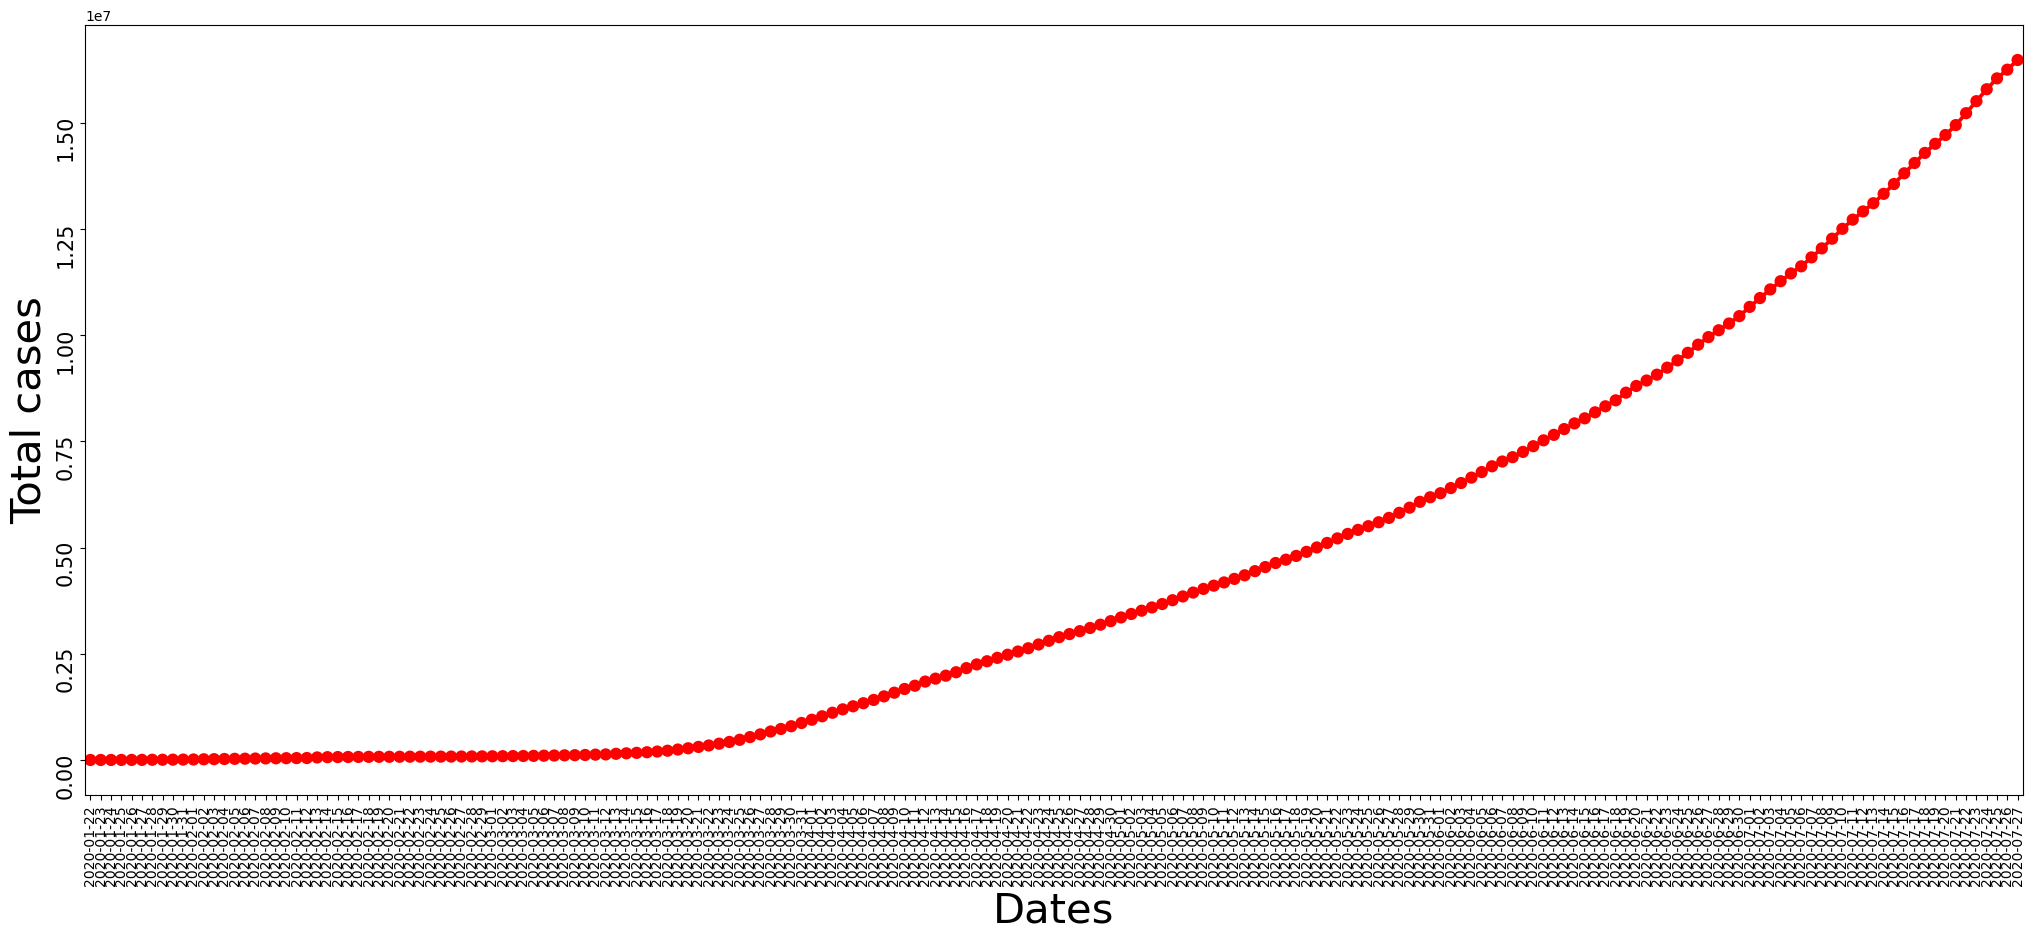

In [29]:
# # TREND OF HOW COVID SPREAD
plt.figure(figsize=(25,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.yticks(rotation = 90)
# plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
total_cases = df.groupby("date")['date','confirmed'].sum().reset_index()
total_cases

ax = sns.pointplot(x=total_cases.date, y=total_cases.confirmed, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

In [30]:
total_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [31]:
# Top 20 countries having most death cases
top_deaths =df.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()
top_deaths

,country,deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

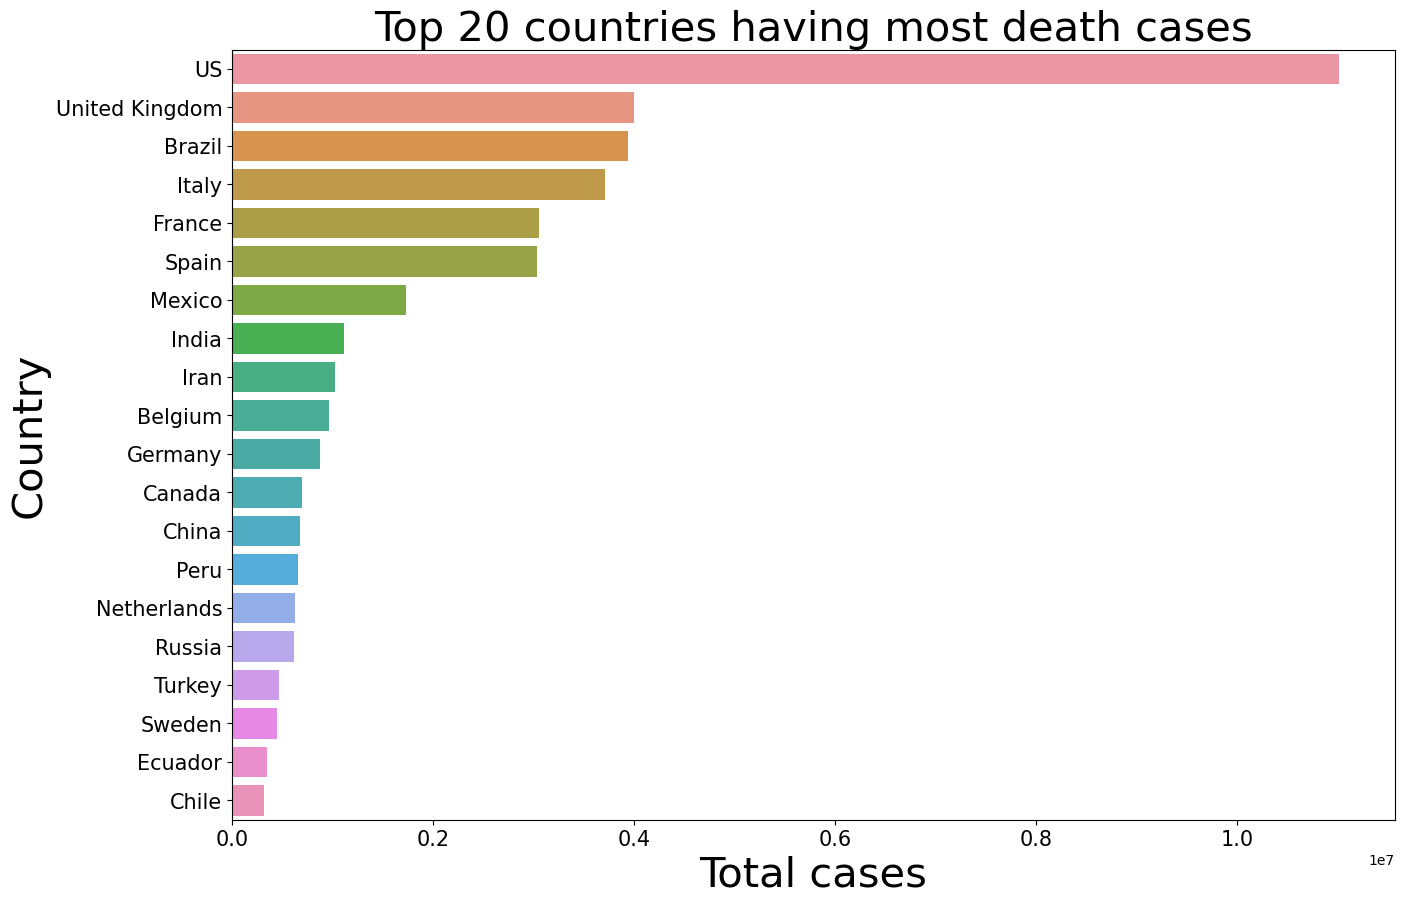

In [32]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most death cases",fontsize=30)
ax = sns.barplot(x=top_deaths.deaths, y=top_deaths.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [34]:
# Top 20 countries having most active cases
top_active =df.groupby(by="country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_active

,country,active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

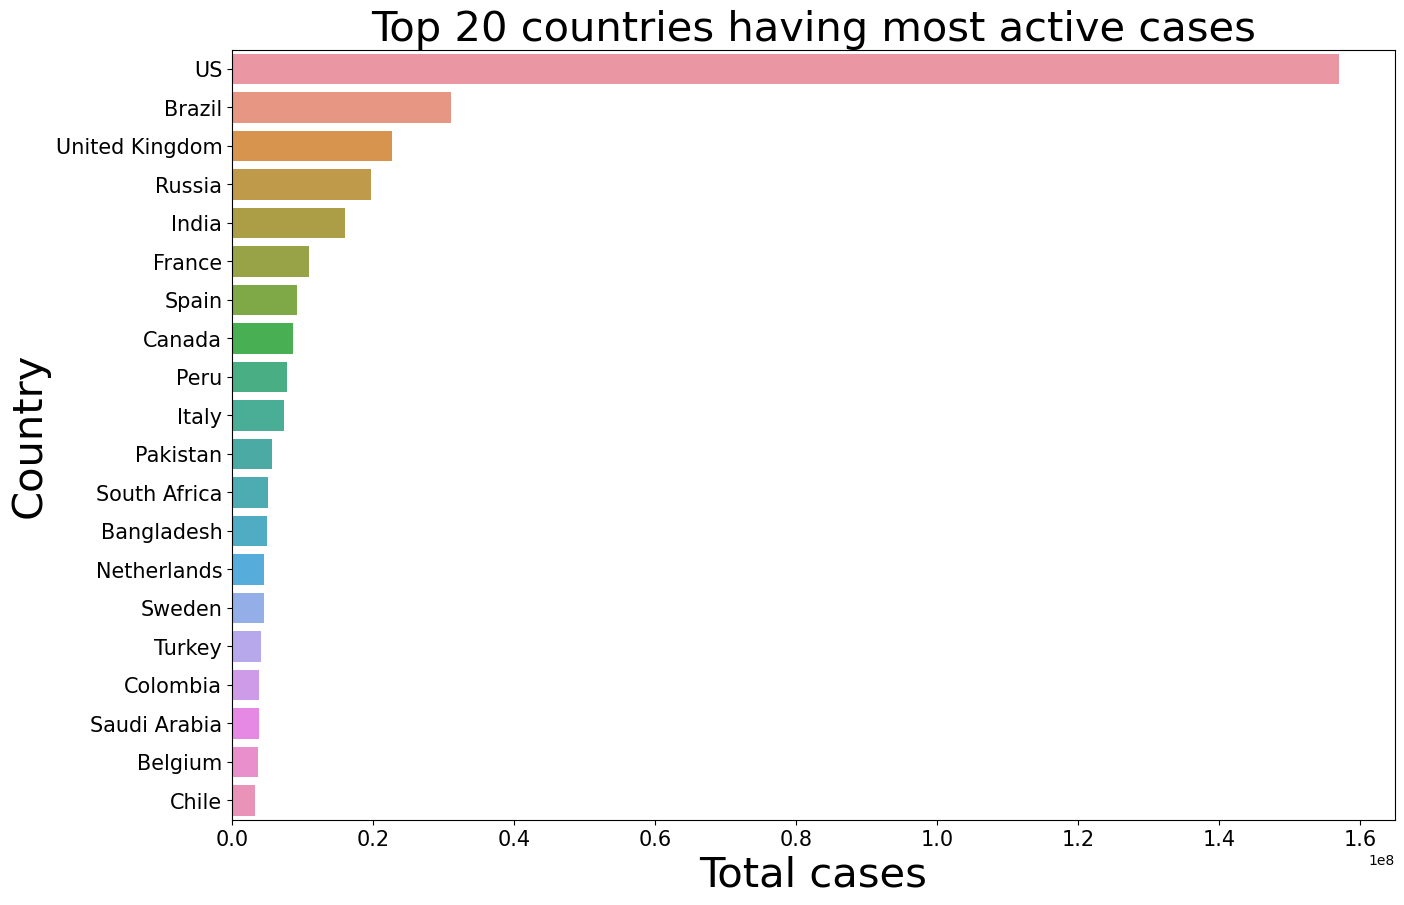

In [35]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)
ax = sns.barplot(x=top_active.active, y=top_active.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [37]:
# Top 20 countries having most confirmed cases
top_confirmed =df.groupby(by="country")["confirmed"].sum().sort_values(ascending=False).head(20).reset_index()
top_confirmed

,country,confirmed
0,US,224345948
1,Brazil,89524967
2,Russia,45408411
3,India,40883464
4,Spain,27404045
5,United Kingdom,26748587
6,Italy,26745145
7,France,21210926
8,Germany,21059152
9,Iran,19339267


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

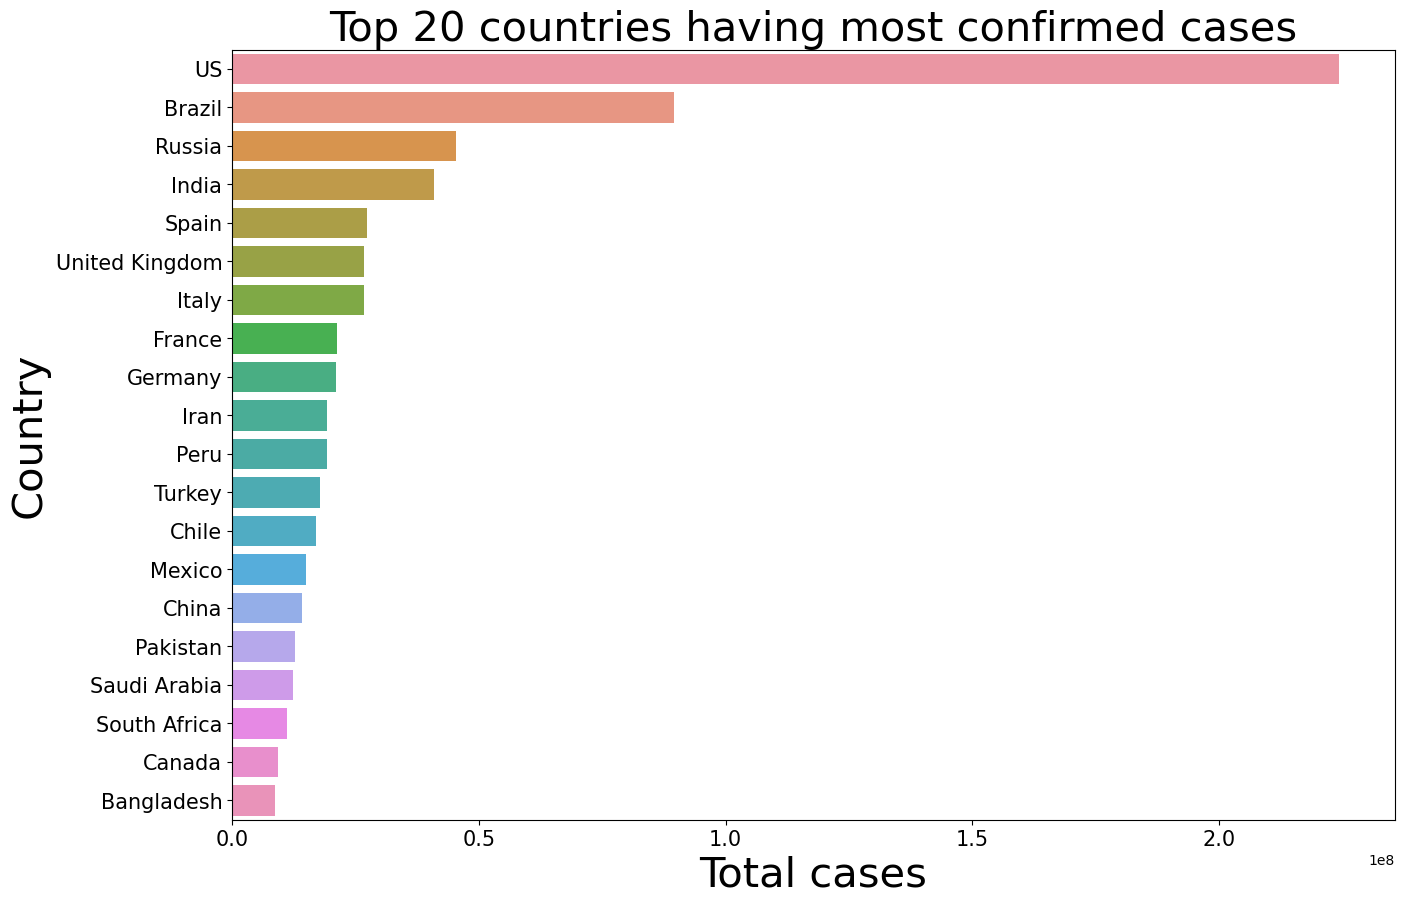

In [38]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most confirmed cases",fontsize=30)
ax = sns.barplot(x=top_confirmed.confirmed, y=top_active.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [39]:
Brazil = df[df.country=="Brazil"]
Brazil = Brazil.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
Brazil

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1620313,84082,2287475,583080
184,2020-07-24,1693214,85238,2343366,564914
185,2020-07-25,1785359,86449,2394513,522705
186,2020-07-26,1812913,87004,2419091,519174


In [40]:
US = df[df.country=="US"]
US = US.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
US

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,1,1
1,2020-01-23,0,0,1,1
2,2020-01-24,0,0,2,2
3,2020-01-25,0,0,2,2
4,2020-01-26,0,0,5,5
...,...,...,...,...,...
183,2020-07-23,1233269,144430,4038816,2661117
184,2020-07-24,1261624,145560,4112531,2705347
185,2020-07-25,1279414,146465,4178970,2753091
186,2020-07-26,1297863,146935,4233923,2789125


In [41]:
Russia = df[df.country=="Russia"]
Russia = Russia.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
Russia

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,579295,12873,793720,201552
184,2020-07-24,587728,13026,799499,198745
185,2020-07-25,596064,13172,805332,196096
186,2020-07-26,599172,13249,811073,198652


In [42]:
India = df[df.country=="India"]
India = India.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
India

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,817209,30601,1288108,440298
184,2020-07-24,849432,31358,1337024,456234
185,2020-07-25,885573,32060,1385635,468002
186,2020-07-26,917568,32771,1435616,485277


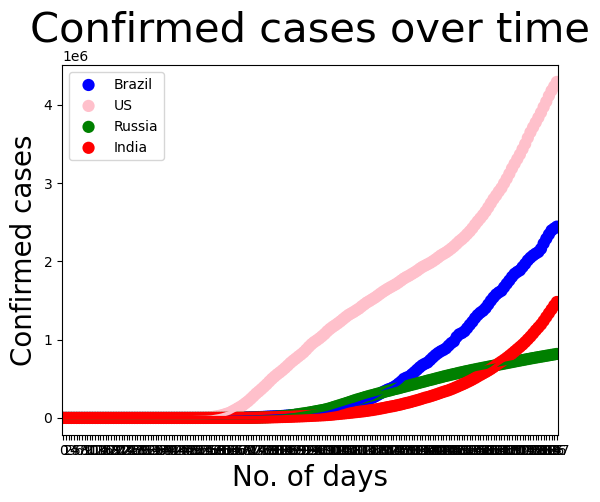

In [43]:
sns.pointplot(data=Brazil, x=Brazil.index, y='confirmed', color="Blue", label="Brazil")
sns.pointplot(data=US, x=US.index, y='confirmed', color="Pink", label="US")
sns.pointplot(data=Russia, x=Russia.index, y='confirmed', color="Green", label="Russia")
sns.pointplot(data=India, x=India.index, y='confirmed', color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Confirmed cases', fontsize=20)
plt.title('Confirmed cases over time', fontsize=30)

# Adding a legend to distinguish the countries
plt.legend()

plt.show()

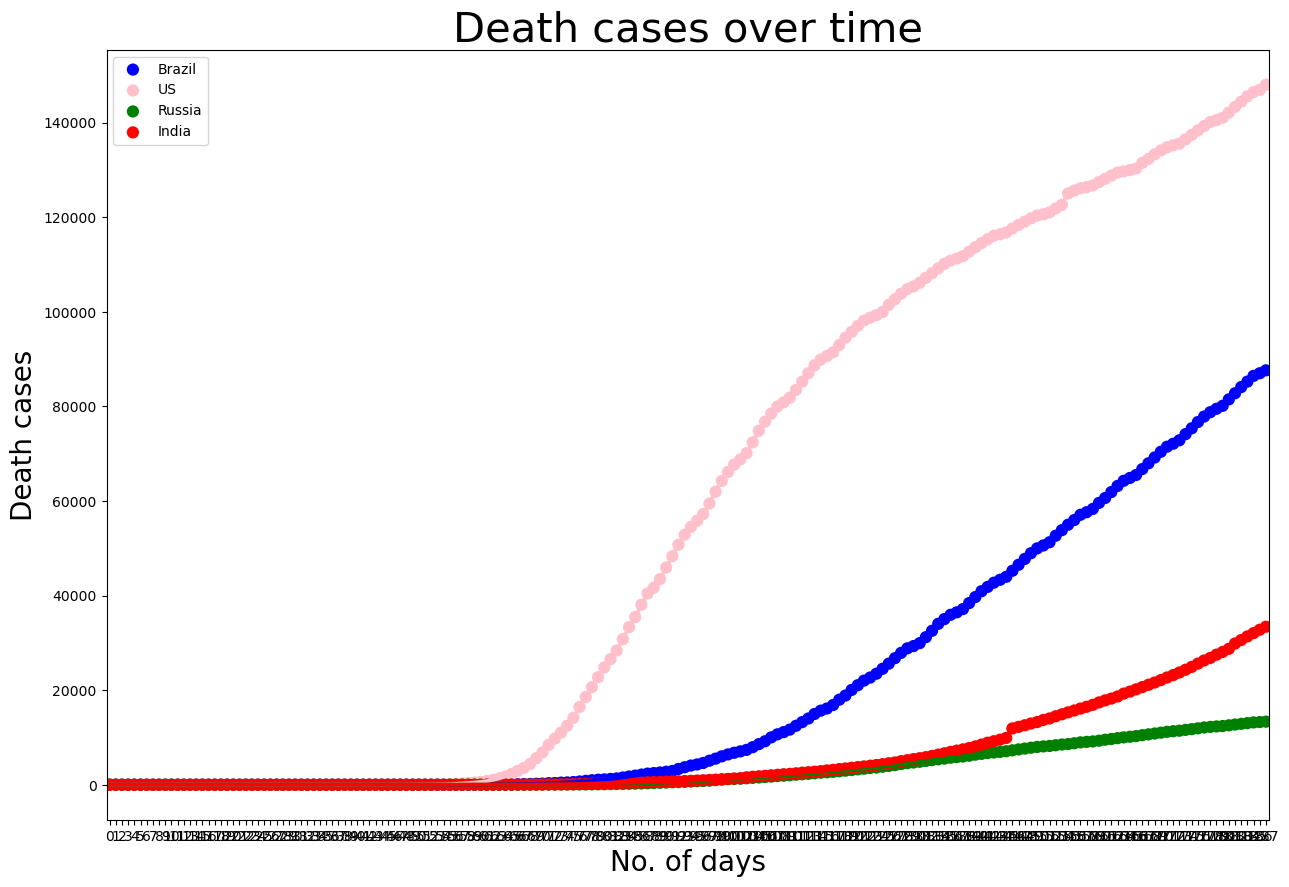

In [47]:
plt.figure(figsize=(15, 10))

# Plotting the data for each country
sns.pointplot(x=Brazil.index, y=Brazil.deaths, color="Blue", label="Brazil")
sns.pointplot(x=US.index, y=US.deaths, color="Pink", label="US")
sns.pointplot(x=Russia.index, y=Russia.deaths, color="Green", label="Russia")
sns.pointplot(x=India.index, y=India.deaths, color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Death cases', fontsize=20)
plt.title('Death cases over time', fontsize=30)
# Adding a legend to distinguish the countries
plt.legend()
plt.show()

In [49]:
# russia has the least no of confirmed & death cases

## Forecasting using FB Prophet

FB Prophet - Open source forecasting tool developed by FB, no need to make it stationary

Prophet is a forecasting tool open-sourced by Facebook that is designed for creating accurate time-series forecasts.
It's widely used for its simplicity and ability to handle various time-series data types with customizable features.
Whether it's daily observations, irregular intervals, or seasonality, Prophet can often adapt well.

In [51]:
!pip install prophet

In [52]:
from prophet import Prophet

In [53]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [54]:
# converting date to datetime format
df['date'] = pd.to_datetime(df['date'])

In [111]:
active=df.groupby("date").sum()["active"].reset_index()
active

,date,active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [55]:
confirmed=df.groupby("date").sum()["confirmed"].reset_index()
confirmed

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [56]:
deaths=df.groupby("date").sum()["deaths"].reset_index()
deaths

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [57]:
recovered=df.groupby("date").sum()["recovered"].reset_index()
recovered

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


For building a forecasting model using fbProphet library, there should be only 2 columns passed.

The column names should always be --> 'ds','y'

In [58]:
confirmed.rename(columns={"date":"ds","confirmed":"y"},inplace=True)
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [59]:
con_model=Prophet(interval_width=0.95)
# confidence int = 95
# rest 3% error

In [60]:
# Training of Model (fiting the data to the model)
con_model.fit(confirmed)

21:53:50 - cmdstanpy - INFO - Chain [1] start processing
21:53:51 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
future=con_model.make_future_dataframe(periods=7)

In [62]:
future #for upcoming 7 days

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [64]:
forecast=con_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632401e+07,1.616808e+07,1.648278e+07
189,2020-07-29,1.653405e+07,1.636788e+07,1.669508e+07
190,2020-07-30,1.674820e+07,1.659557e+07,1.691509e+07
191,2020-07-31,1.696362e+07,1.679266e+07,1.711784e+07
192,2020-08-01,1.717143e+07,1.700421e+07,1.734178e+07
193,2020-08-02,1.736922e+07,1.719440e+07,1.754364e+07
194,2020-08-03,1.756410e+07,1.736923e+07,1.773733e+07


In [77]:
# yhat_lower: error margin lower boundary
# yhat_upper: error margin upper boundary
# max & min 

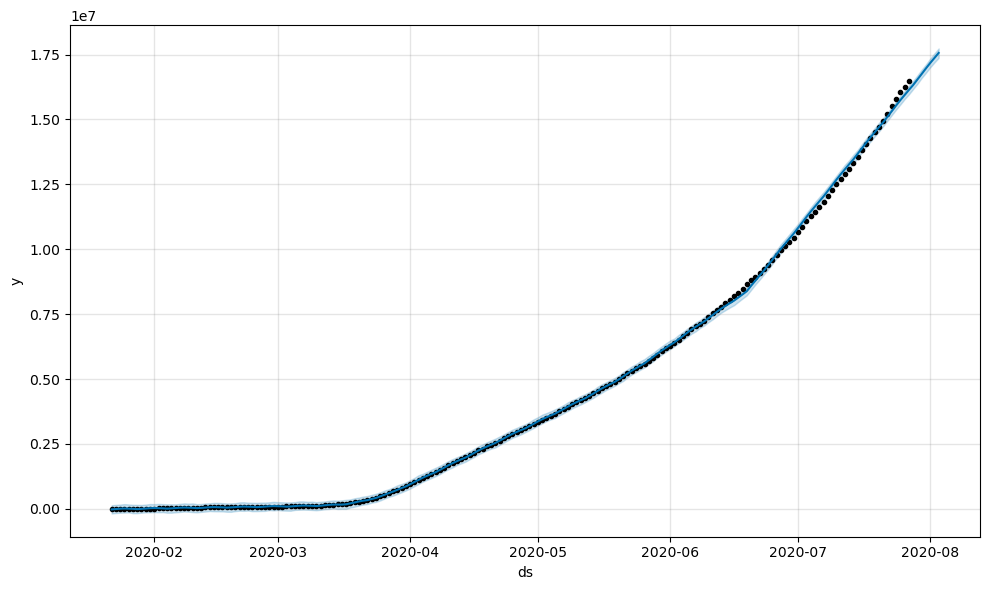

In [65]:
confirmed_plot=con_model.plot(forecast)

In [66]:
# dark blue : OG data
# lb : predicted data
# shaded: error margin

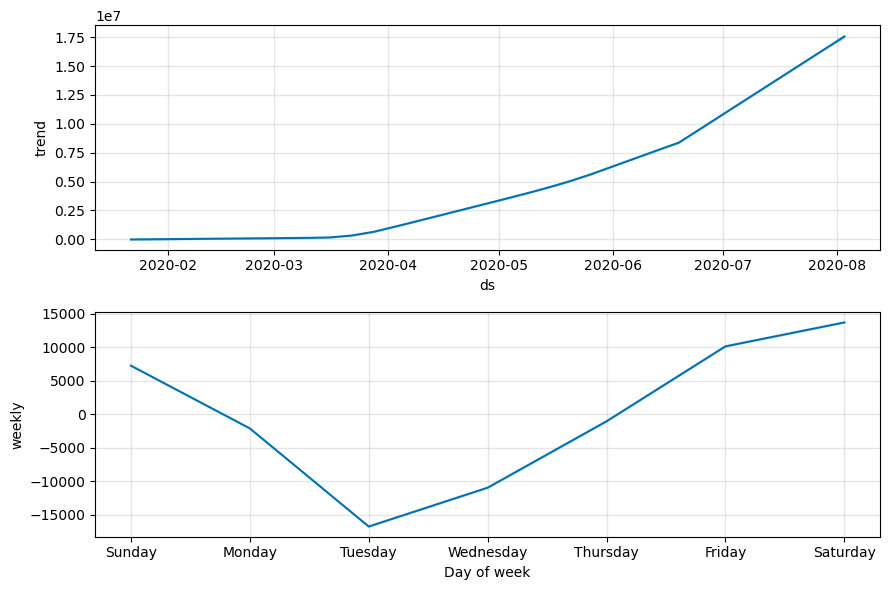

In [68]:
confirmed_forecast_plot1 = con_model.plot_components(forecast)

### Forecast for death cases

In [72]:
deaths.rename(columns={"date":"ds","deaths":"y"},inplace=True)
deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [90]:
deaths_model=Prophet(interval_width=0.99)

In [91]:
deaths_model.fit(deaths)

22:06:37 - cmdstanpy - INFO - Chain [1] start processing
22:06:37 - cmdstanpy - INFO - Chain [1] done processing


In [92]:
future_deaths=con_model.make_future_dataframe(periods=7)

In [93]:
future_deaths

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [94]:
forecast=deaths_model.predict(future_deaths)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,652342.857217,648437.628969,655967.595413
189,2020-07-29,657910.776693,654222.774873,661518.615796
190,2020-07-30,663521.743356,659464.414656,667582.552741
191,2020-07-31,669038.962960,664736.318436,673380.503809
192,2020-08-01,673922.465056,668985.879148,679248.764993
193,2020-08-02,678060.469456,671101.394618,684784.530270
194,2020-08-03,682351.854619,673575.175062,689877.074758


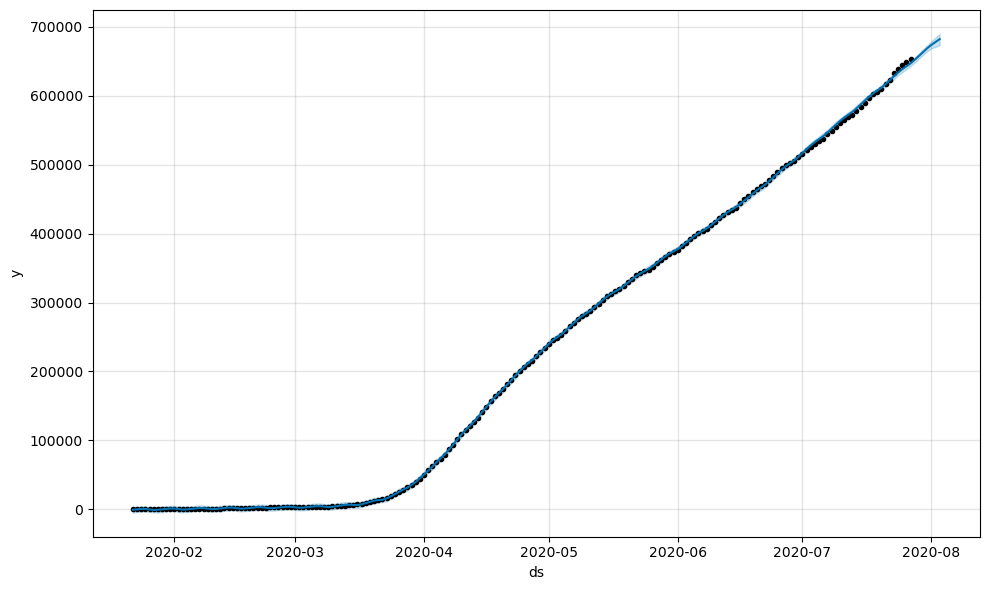

In [95]:
confirmed_plot=deaths_model.plot(forecast)

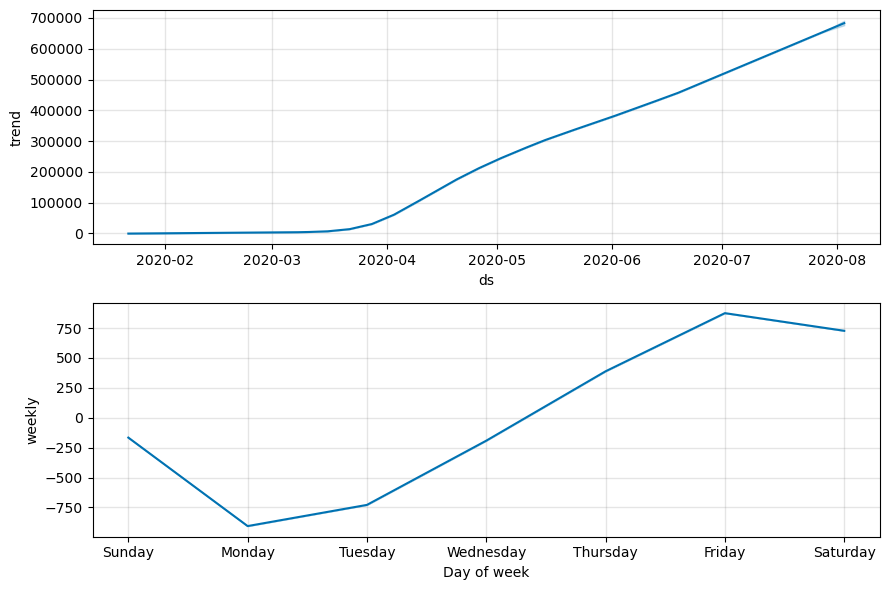

In [97]:
deaths_forecast_plot1 = deaths_model.plot_components(forecast)

### Forecast for recovered cases

In [98]:
recovered.rename(columns={"date":"ds","recovered":"y"},inplace=True)
recovered

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [99]:
rec_model=Prophet(interval_width=0.99)

In [101]:
rec_model.fit(recovered)

22:12:48 - cmdstanpy - INFO - Chain [1] start processing
22:12:48 - cmdstanpy - INFO - Chain [1] done processing


In [105]:
future_rec=rec_model.make_future_dataframe(periods=7)
future_rec

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [106]:
forecast=rec_model.predict(future_rec)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,9.313528e+06,9.169048e+06,9.471761e+06
189,2020-07-29,9.455717e+06,9.306227e+06,9.614296e+06
190,2020-07-30,9.598531e+06,9.433451e+06,9.749490e+06
191,2020-07-31,9.740095e+06,9.589897e+06,9.900064e+06
192,2020-08-01,9.880394e+06,9.738402e+06,1.005004e+07
193,2020-08-02,1.000646e+07,9.844161e+06,1.017003e+07
194,2020-08-03,1.014305e+07,9.969258e+06,1.034148e+07


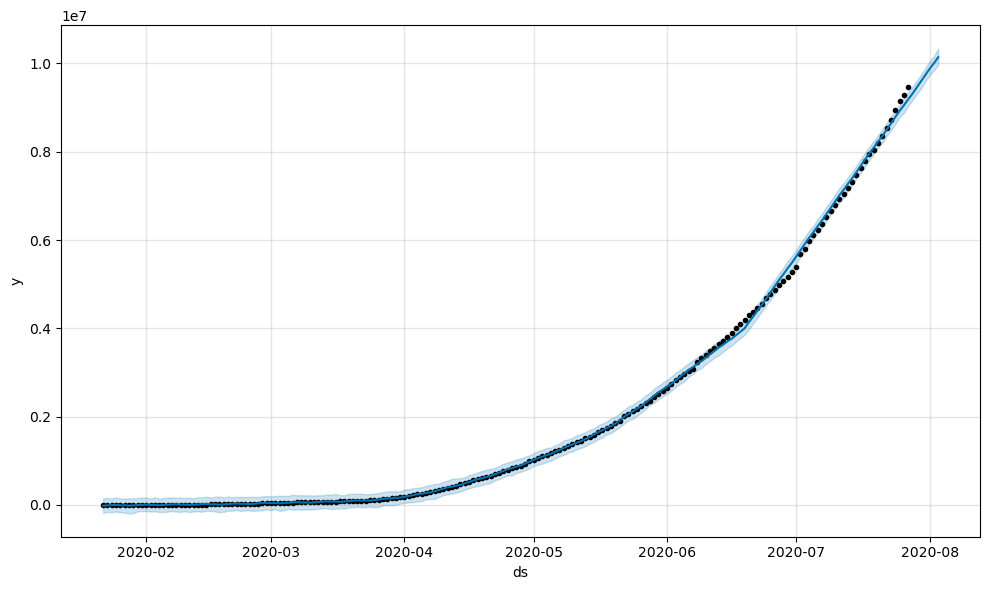

In [107]:
confirmed_plot=rec_model.plot(forecast)

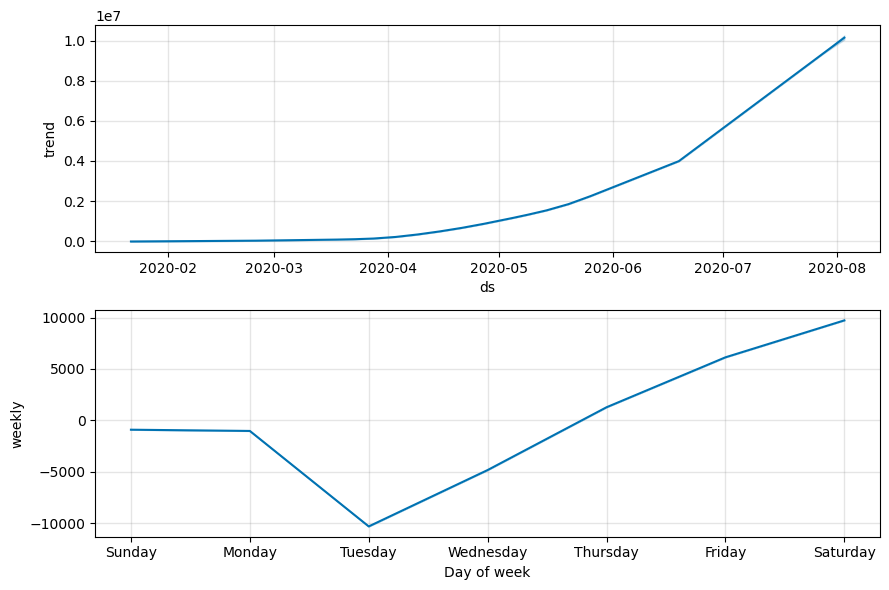

In [109]:
rec_forecast_plot1 = rec_model.plot_components(forecast)

### For active cases

In [114]:
active.rename(columns={"date":"ds","active":"y"},inplace=True)
active

active_model=Prophet(interval_width=0.99)
active_model.fit(active)

future_active=active_model.make_future_dataframe(periods=7)
future_active

22:18:30 - cmdstanpy - INFO - Chain [1] start processing
22:18:30 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [115]:
forecast=active_model.predict(future_active)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,6.353204e+06,6.251330e+06,6.444969e+06
189,2020-07-29,6.415552e+06,6.329999e+06,6.507544e+06
190,2020-07-30,6.481007e+06,6.391993e+06,6.587624e+06
191,2020-07-31,6.549045e+06,6.456154e+06,6.644400e+06
192,2020-08-01,6.611208e+06,6.517028e+06,6.708437e+06
193,2020-08-02,6.678514e+06,6.574900e+06,6.780926e+06
194,2020-08-03,6.732249e+06,6.625617e+06,6.842506e+06


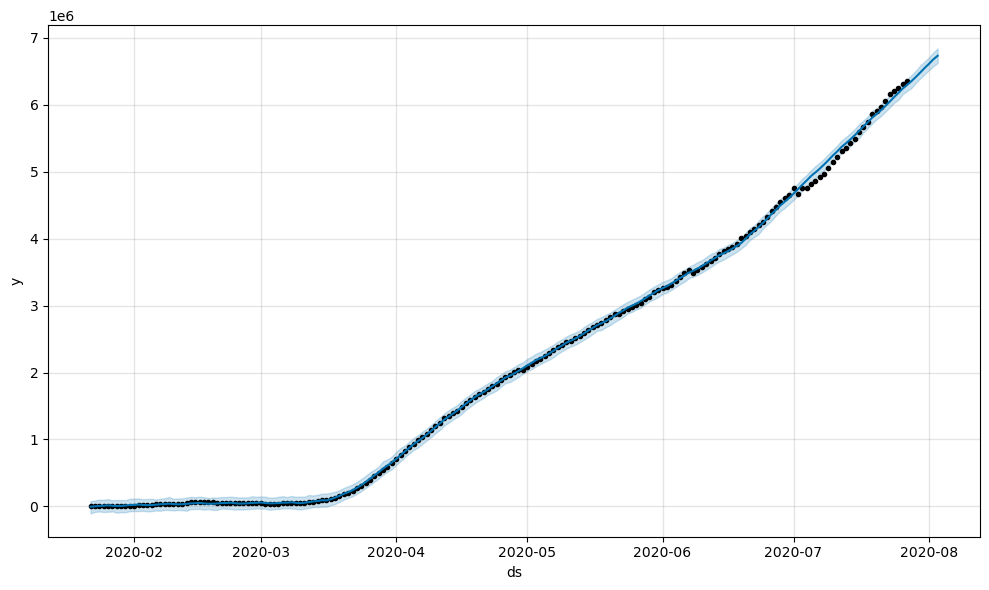

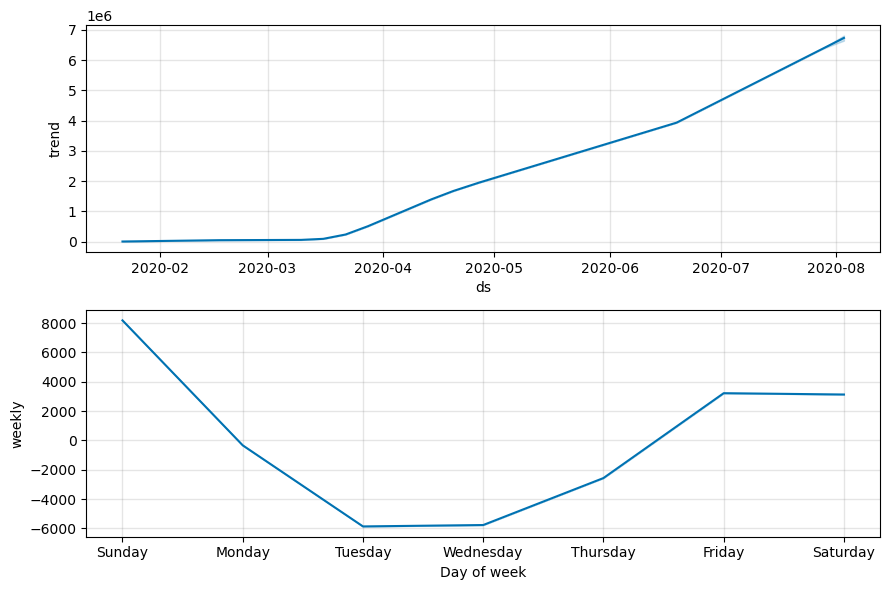

In [116]:
confirmed_plot=active_model.plot(forecast)

active_forecast_plot1 = active_model.plot_components(forecast)